In [13]:
! conda create -n new_env python=3.11 -y
! conda activate new_env

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
/ DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/noarch/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/noarch/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/osx-64/current_repodata.json HTTP/1.1" 304 0
- DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/osx-64/current_repodata.json HTTP/1.1" 304 0
done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 24.7.1

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated durin

In [2]:
! conda install -p /Users/stan/anaconda3/envs/new_env ipykernel --update-deps --force-reinstall -y

Channels:
 - defaults
 - conda-forge
Platform: osx-64
Solving environment: | Channels:
 - defaults
 - conda-forge
Platform: osx-64
Solving environment: / \ done
done

## Package Plan ##

  environment location: /Users/stan/anaconda3/envs/new_env

  added / updated specs:
    - ipykernel


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    decorator-5.1.1            |     pyhd3eb1b0_0          12 KB
    jedi-0.19.1                |  py311hecd8cb5_0         1.2 MB
    jupyter_core-5.7.2         |  py311hecd8cb5_0          98 KB
    libsodium-1.0.18           |       h1de35cc_0         236 KB
    nest-asyncio-1.6.0         |  py311hecd8cb5_0          18 KB
    packaging-24.1             |  py311hecd8cb5_0         172 KB
    pickleshare-0.7.5          |  pyhd3eb1b0_1003          13 KB
    ptyprocess-0.7.0           |     pyhd3eb1b0_2          17 KB
    python-dateutil-2.9.0post0 |  py311hecd8cb

In [ ]:
! pip install pandas
! pip install scikit-learn
! pip install matplotlib

In [8]:
import os
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from matplotlib import pyplot as plt

Matplotlib is building the font cache; this may take a moment.
fc-list: major issue: So far, no MiKTeX administrator has checked for updates.
Fontconfig warning: ignoring UTF-8: not a valid region tag
fc-list: major issue: So far, no MiKTeX administrator has checked for updates.


In [9]:
data_exp = pd.read_csv('/Users/stan/Desktop/spring_semester/AI_for_personalised_medicine/final_assignment/expression_data.csv')
data_ic50 = pd.read_csv('/Users/stan/Desktop/spring_semester/AI_for_personalised_medicine/final_assignment/ic50_data.csv')

data_exp = data_exp.iloc[:,1:]
data_ic50 = data_ic50.iloc[:,1:]

### Add comparison data, test if there are any correlation between ic50 and survival status

In [67]:
data_skcm_rna = pd.read_csv('/Users/stan/Desktop/spring_semester/AI_for_personalised_medicine/final_assignment/skcm_tcga_pan_can_atlas_2018/data_mrna_seq_v2_rsem.txt', sep='\t', index_col= False)
data_skcm_rna = data_skcm_rna.dropna(subset=['Hugo_Symbol'])
# data_skcm_rna = data_skcm_rna.set_index('Hugo_Symbol', drop=True)

# change columns` name for matching with patient informaiton
new_columns = []
for col in data_skcm_rna.columns:
    if col not in ['Hugo_Symbol', 'Entrez_Gene_Id']:
        new_columns.append('-'.join(col.split('-')[:3]))
    else:
        new_columns.append(col)

data_skcm_rna.columns = new_columns

# # delete Na rows， gene id
data_skcm_rna = data_skcm_rna.drop(columns=['Entrez_Gene_Id'])

# # set index
data_skcm_rna = data_skcm_rna.set_index('Hugo_Symbol', drop=True)
data_skcm_rna = data_skcm_rna.transpose()
data_skcm_rna = data_skcm_rna.reset_index()
data_skcm_rna = data_skcm_rna.rename(columns={'index':'PATIENT_ID'})
data_skcm_rna


Hugo_Symbol    PATIENT_ID  UBE2Q2P2   HMGB1P1  RNU12-2P   SSX9P   EZHIP  \
0            TCGA-3N-A9WB    6.4338  143.5700    0.8078  0.0000  0.4039   
1            TCGA-3N-A9WC    8.0016   84.6612    0.4015  0.0000  0.8030   
2            TCGA-3N-A9WD    3.8794  118.8790    0.0000  0.0000  0.7092   
3            TCGA-BF-A1PU    0.0000   92.8766    0.0000  0.6494  0.0000   
4            TCGA-BF-A1PV    3.3861  163.9870    0.0000  0.0000  0.0000   
..                    ...       ...       ...       ...     ...     ...   
438          TCGA-YG-AA3O    7.8851   75.8395    1.6899  0.0000  0.0000   
439          TCGA-YG-AA3P    2.5253   97.4853    0.5328  0.0000  0.0000   
440          TCGA-Z2-A8RT    2.5426  103.9770    0.7752  0.0000  8.5271   
441          TCGA-Z2-AA3S    3.3926  120.7780    0.2880  0.0000  0.5760   
442          TCGA-Z2-AA3V    2.4783   29.0011    0.0000  0.0000  0.0000   

Hugo_Symbol  EFCAB8  SRP14P1  TRIM75P  SPATA31B1P  ...    ZWILCH     ZWINT  \
0            0.0000   4.0388    0.000         0.0  ...  507.6540  1418.420   
1            1.6059   5.2193    0.000         0.0  ...  423.1300   434.006   
2            1.4184   3.5461    0.000         0.0  ...  213.1350   423.404   
3            1.9481  11.6883    0.000         0.0  ...  418.9030   566.234   
4            0.0000   7.1727    0.000         0.0  ...  586.9490   783.622   
..              ...      ...      ...         ...  ...       ...       ...   
438          0.0000   2.7038    0.000         0.0  ...  472.3280   888.551   
439          2.1311   3.1966    0.000         0.0  ...  467.0700   375.599   
440          0.7752   6.2016    0.000         0.0  ...  638.0150  1034.880   
441          0.5760   3.4560    0.288         0.0  ...  533.0870   536.540   
442          2.6157   2.6157    0.000         0.0  ...   56.5964   610.103   

Hugo_Symbol     ZXDA     ZXDB      ZXDC   ZYG11A     ZYG11B       ZYX  \
0            16.5590  164.782   773.425   7.2698   644.5880   1236.27   
1            46.1708  286.259  1020.580   0.8030   690.1540   3594.50   
2            25.5319  234.752  1126.240  15.6028   849.6450   3270.21   
3            33.4416  245.130  1023.700   0.0000   436.0390   5132.14   
4            49.6115  300.060   742.977   0.0000   991.6320   5128.21   
..               ...      ...       ...      ...        ...       ...   
438          60.1605  332.573   942.966   1.0139   994.0010   3125.31   
439          35.1625  277.038   569.526   0.0000   922.2160   1925.41   
440          55.4264  416.667  1356.980   1.9380   478.2950   2865.12   
441          56.7355  405.213   518.684   0.0000  1629.4900   2136.94   
442          17.0018   85.009   877.554   0.0000    75.8542  11832.60   

Hugo_Symbol     ZZEF1      ZZZ3  
0             622.779   721.325  
1             883.670  1137.810  
2            1105.670   769.504  
3            1796.100   286.039  
4            1097.430  1659.000  
..                ...       ...  
438          2671.400   940.600  
439          1480.550  1003.730  
440          1849.610   454.264  
441          1640.430  1452.370  
442          1413.110   102.011  

[443 rows x 20519 columns]

In [60]:
# data_clinical_patient.txt
data_skcm_patient = pd.read_csv('/Users/stan/Desktop/spring_semester/AI_for_personalised_medicine/final_assignment/skcm_tcga_pan_can_atlas_2018/data_clinical_patient.txt', sep='\t',skiprows=4)
data_skcm_patient = data_skcm_patient.dropna(subset=["OS_STATUS", "OS_MONTHS"])
data_skcm_patient

PATIENT_ID SUBTYPE CANCER_TYPE_ACRONYM  \
0    TCGA-3N-A9WB    SKCM                SKCM   
1    TCGA-3N-A9WC    SKCM                SKCM   
2    TCGA-3N-A9WD    SKCM                SKCM   
3    TCGA-BF-A1PU     NaN                SKCM   
4    TCGA-BF-A1PV     NaN                SKCM   
..            ...     ...                 ...   
437  TCGA-YG-AA3O    SKCM                SKCM   
438  TCGA-YG-AA3P    SKCM                SKCM   
439  TCGA-Z2-A8RT    SKCM                SKCM   
440  TCGA-Z2-AA3S    SKCM                SKCM   
441  TCGA-Z2-AA3V    SKCM                SKCM   

                         OTHER_PATIENT_ID   AGE     SEX  \
0    5564E6A7-2195-4B0D-994E-B0617B58E889  71.0    Male   
1    551E071A-C290-4B48-9000-F64C2A44DFB7  82.0    Male   
2    A29A20E3-5C2C-4F37-B93E-AE9EBC46EC53  82.0    Male   
3    3DD5A206-D7F3-42F1-B9CC-4B31C76D495D  46.0  Female   
4    EFF78AF6-0F68-49B9-866B-0D511606F2B1  74.0  Female   
..                                    ...   ...     ...   
437  19E9BA4B-8F8E-4899-B667-B49FDD7EF6F4  62.0    Male   
438  F1713C39-26B8-4667-A08B-F8CF6D2B8E13  63.0  Female   
439  590B5E18-D837-4C0E-BECF-80520DB57C0F  42.0  Female   
440  71B347AC-6AC6-475D-8E21-754764180948  58.0    Male   
441  5B10234B-6189-449F-8886-D0D44A729CED  57.0  Female   

    AJCC_PATHOLOGIC_TUMOR_STAGE AJCC_STAGING_EDITION DAYS_LAST_FOLLOWUP  \
0                      STAGE IA                  7TH                NaN   
1                     STAGE IIA                  6TH               2022   
2                    STAGE IIIA                  7TH                NaN   
3                     STAGE IIC                  7TH                387   
4                     STAGE IIC                  7TH                 14   
..                          ...                  ...                ...   
437                         NaN                  NaN               1096   
438                   STAGE IIB                  7TH                439   
439                   STAGE IIB                  7TH                839   
440                    STAGE IA                  6TH               2950   
441                    STAGE IA                  7TH                486   

    DAYS_TO_BIRTH  ...  IN_PANCANPATHWAYS_FREEZE   OS_STATUS  OS_MONTHS  \
0          -26176  ...                       Yes  1:DECEASED  17.029950   
1          -30286  ...                       Yes    0:LIVING  66.475984   
2          -30163  ...                       Yes  1:DECEASED  12.986159   
3          -17025  ...                        No    0:LIVING  12.723148   
4          -27124  ...                        No    0:LIVING   0.460269   
..            ...  ...                       ...         ...        ...   
437        -22999  ...                       Yes  1:DECEASED  37.939310   
438        -23219  ...                       Yes    0:LIVING  14.432719   
439        -15342  ...                       Yes    0:LIVING  27.583259   
440        -21318  ...                       Yes    0:LIVING  96.985239   
441        -20937  ...                       Yes    0:LIVING  15.977907   

                     DSS_STATUS DSS_MONTHS DFS_STATUS DFS_MONTHS  \
0             1:DEAD WITH TUMOR  17.029950        NaN        NaN   
1    0:ALIVE OR DEAD TUMOR FREE  66.475984        NaN        NaN   
2             1:DEAD WITH TUMOR  12.986159        NaN        NaN   
3    0:ALIVE OR DEAD TUMOR FREE  12.723148        NaN        NaN   
4    0:ALIVE OR DEAD TUMOR FREE   0.460269        NaN        NaN   
..                          ...        ...        ...        ...   
437           1:DEAD WITH TUMOR  37.939310        NaN        NaN   
438  0:ALIVE OR DEAD TUMOR FREE  14.432719        NaN        NaN   
439  0:ALIVE OR DEAD TUMOR FREE  27.583259        NaN        NaN   
440  0:ALIVE OR DEAD TUMOR FREE  96.985239        NaN        NaN   
441  0:ALIVE OR DEAD TUMOR FREE  15.977907        NaN        NaN   

        PFS_STATUS PFS_MONTHS GENETIC_ANCESTRY_LABEL  
0    1:PROGRESSION  14.005326      

In [62]:
data_skcm_patient_selected = pd.DataFrame(data_skcm_patient, columns=['PATIENT_ID', 'OS_STATUS', 'OS_MONTHS'])
data_skcm_patient_selected['OS_STATUS'] = data_skcm_patient_selected['OS_STATUS'].replace({
    '1:DECEASED': 1,
    '0:LIVING': 0
})
data_skcm_patient_selected['OS_STATUS'] = data_skcm_patient_selected['OS_STATUS'].astype(int)
# data_skcm_patient_selected = data_skcm_patient_selected.set_index("PATIENT_ID", drop=True)
data_skcm_patient_selected

/var/folders/p4/2jf9yhzs1nb06w2znky4s3f00000gn/T/ipykernel_28478/3430018242.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_skcm_patient_selected['OS_STATUS'] = data_skcm_patient_selected['OS_STATUS'].replace({


PATIENT_ID  OS_STATUS  OS_MONTHS
0    TCGA-3N-A9WB          1  17.029950
1    TCGA-3N-A9WC          0  66.475984
2    TCGA-3N-A9WD          1  12.986159
3    TCGA-BF-A1PU          0  12.723148
4    TCGA-BF-A1PV          0   0.460269
..            ...        ...        ...
437  TCGA-YG-AA3O          1  37.939310
438  TCGA-YG-AA3P          0  14.432719
439  TCGA-Z2-A8RT          0  27.583259
440  TCGA-Z2-AA3S          0  96.985239
441  TCGA-Z2-AA3V          0  15.977907

[427 rows x 3 columns]

In [75]:
data_skcm_rna_train = pd.merge(data_skcm_patient_selected, data_skcm_rna, on = 'PATIENT_ID', how='inner')
data_skcm_rna_train

PATIENT_ID  OS_STATUS  OS_MONTHS  UBE2Q2P2   HMGB1P1  RNU12-2P   SSX9P  \
0    TCGA-3N-A9WB          1  17.029950    6.4338  143.5700    0.8078  0.0000   
1    TCGA-3N-A9WC          0  66.475984    8.0016   84.6612    0.4015  0.0000   
2    TCGA-3N-A9WD          1  12.986159    3.8794  118.8790    0.0000  0.0000   
3    TCGA-BF-A1PU          0  12.723148    0.0000   92.8766    0.0000  0.6494   
4    TCGA-BF-A1PV          0   0.460269    3.3861  163.9870    0.0000  0.0000   
..            ...        ...        ...       ...       ...       ...     ...   
423  TCGA-YG-AA3O          1  37.939310    7.8851   75.8395    1.6899  0.0000   
424  TCGA-YG-AA3P          0  14.432719    2.5253   97.4853    0.5328  0.0000   
425  TCGA-Z2-A8RT          0  27.583259    2.5426  103.9770    0.7752  0.0000   
426  TCGA-Z2-AA3S          0  96.985239    3.3926  120.7780    0.2880  0.0000   
427  TCGA-Z2-AA3V          0  15.977907    2.4783   29.0011    0.0000  0.0000   

      EZHIP  EFCAB8  SRP14P1  ...    ZWILCH     ZWINT     ZXDA     ZXDB  \
0    0.4039  0.0000   4.0388  ...  507.6540  1418.420  16.5590  164.782   
1    0.8030  1.6059   5.2193  ...  423.1300   434.006  46.1708  286.259   
2    0.7092  1.4184   3.5461  ...  213.1350   423.404  25.5319  234.752   
3    0.0000  1.9481  11.6883  ...  418.9030   566.234  33.4416  245.130   
4    0.0000  0.0000   7.1727  ...  586.9490   783.622  49.6115  300.060   
..      ...     ...      ...  ...       ...       ...      ...      ...   
423  0.0000  0.0000   2.7038  ...  472.3280   888.551  60.1605  332.573   
424  0.0000  2.1311   3.1966  ...  467.0700   375.599  35.1625  277.038   
425  8.5271  0.7752   6.2016  ...  638.0150  1034.880  55.4264  416.667   
426  0.5760  0.5760   3.4560  ...  533.0870   536.540  56.7355  405.213   
427  0.0000  2.6157   2.6157  ...   56.5964   610.103  17.0018   85.009   

         ZXDC   ZYG11A     ZYG11B       ZYX     ZZEF1      ZZZ3  
0     773.425   7.2698   644.5880   1236.27   622.779   721.325  
1    1020.580   0.8030   690.1540   3594.50   883.670  1137.810  
2    1126.240  15.6028   849.6450   3270.21  1105.670   769.504  
3    1023.700   0.0000   436.0390   5132.14  1796.100   286.039  
4     742.977   0.0000   991.6320   5128.21  1097.430  1659.000  
..        ...      ...        ...       ...       ...       ...  
423   942.966   1.0139   994.0010   3125.31  2671.400   940.600  
424   569.526   0.0000   922.2160   1925.41  1480.550  1003.730  
425  1356.980   1.9380   478.2950   2865.12  1849.610   454.264  
426   518.684   0.0000  1629.4900   2136.94  1640.430  1452.370  
427   877.554   0.0000    75.8542  11832.60  1413.110   102.011  

[428 rows x 20521 columns]

In [17]:
data = pd.merge(data_exp, data_ic50, on=['cell_line'], how='inner')

In [266]:
#data_check = pd.merge(data_exp, data_ic50, on=['cell_line'], how='outer', indicator=True)

In [11]:
data = data.drop_duplicates(subset=['cell_line','Drug.Name'], keep='last')

In [79]:
#data_check[(data_check['Drug.Name']=='Cisplatin') & (data_check['_merge']=='both')]
data

cell_line    TSPAN6  TNMD      DPM1     SCYL3     FIRRM       FGR  \
0      A101D_SKIN  0.600058   0.0  1.309944  0.811589  1.015967  0.000000   
1      A101D_SKIN  0.600058   0.0  1.309944  0.811589  1.015967  0.000000   
2      A101D_SKIN  0.600058   0.0  1.309944  0.811589  1.015967  0.000000   
3      A101D_SKIN  0.600058   0.0  1.309944  0.811589  1.015967  0.000000   
4      A101D_SKIN  0.600058   0.0  1.309944  0.811589  1.015967  0.000000   
...           ...       ...   ...       ...       ...       ...       ...   
15928  WM115_SKIN  0.816549   0.0  0.636403  1.209245  0.657170  0.733533   
15929  WM115_SKIN  0.816549   0.0  0.636403  1.209245  0.657170  0.733533   
15930  WM115_SKIN  0.816549   0.0  0.636403  1.209245  0.657170  0.733533   
15931  WM115_SKIN  0.816549   0.0  0.636403  1.209245  0.657170  0.733533   
15932  WM115_SKIN  0.816549   0.0  0.636403  1.209245  0.657170  0.733533   

            CFH     FUCA2      GCLC  ...    OR7M1P  PAXIP1-DT  OR5B15P  \
0      0.024312  1.366059  1.448566  ...  0.885542   0.858391        0   
1      0.024312  1.366059  1.448566  ...  0.885542   0.858391        0   
2      0.024312  1.366059  1.448566  ...  0.885542   0.858391        0   
3      0.024312  1.366059  1.448566  ...  0.885542   0.858391        0   
4      0.024312  1.366059  1.448566  ...  0.885542   0.858391        0   
...         ...       ...       ...  ...       ...        ...      ...   
15928  9.092855  0.469638  0.918972  ...  0.000000   1.252787       49   
15929  9.092855  0.469638  0.918972  ...  0.000000   1.252787       49   
15930  9.092855  0.469638  0.918972  ...  0.000000   1.252787       49   
15931  9.092855  0.469638  0.918972  ...  0.000000   1.252787       49   
15932  9.092855  0.469638  0.918972  ...  0.000000   1.252787       49   

       LINC02712  LINC02725  OR13I1P  LOC105372990          Drug.Name  \
0           24.5   0.000000     0.00      0.340278  (5Z)-7-Oxozeaenol   
1           24.5   0.000000     0.00      0.340278             123138   
2           24.5   0.000000     0.00      0.340278             123829   
3           24.5   0.000000     0.00      0.340278             150412   
4           24.5   0.000000     0.00      0.340278      5-azacytidine   
...          ...        ...      ...           ...                ...   
15928        0.0   1.986486    36.75      0.000000              ZL049   
15929        0.0   1.986486    36.75      0.000000              ZL109   
15930        0.0   1.986486    36.75      0.000000           ZM447439   
15931        0.0   1.986486    36.75      0.000000        Zoledronate   
15932        0.0   1.986486    36.75      0.000000            ZSTK474   

       Drug.ID      IC50  
0         1242 -1.101155  
1         1824  3.533976  
2         1820  3.627938  
3         1836  3.642094  
4         2156  1.200924  
...        ...       ...  
15928     1197  2.488670  
15929     1379 -0.689029  
15930     1050  4.920855  
15931     1802  4.796355  
15932      223 -0.460228  

[15933 rows x 26714 columns]

## loop for a list of drugs

In [138]:
drug_list = ['Dacarbazine','Temozolomide','Paclitaxel','Cisplatin','Dabrafenib','Trametinib','Nilotinib','Dasatinib']
#drug_list = ['Temozolomide']

param_grid = {
    'n_estimators':[10, 50, 100, 200],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2', 10, 25]
}

model_name = "RF"
#model_name = "LR"

In [140]:
# evaluation metrics
def eval_metrics(pred, true):
    df_pred = pd.DataFrame(pred).reset_index().drop(columns=['index'])
    df_true = pd.DataFrame(true).reset_index().drop(columns=['index'])
    result = pd.concat([df_pred, df_true], axis=1, ignore_index=True)
    result.columns=["Predicted", "Test"]

    rse = ((result['Predicted']-result['Test'])**2).sum()
    mse = rse / len(result)
    rmse = np.sqrt(mse)
    
    r2_value = r2_score(result['Test'], result['Predicted'])

    return rmse, r2_value

### models

In [141]:
result_df = pd.DataFrame()
rmselist = []
r2list = []

fig = plt.figure(figsize=(15,20),dpi=400)
fig.subplots_adjust(hspace=0.5, wspace=0.5)
num = 1

for drug in drug_list:
    # filter input data to model
    input = data[data['Drug.Name']==drug]

    # train test split
    train, test = train_test_split(input, test_size=0.3, random_state=1)

    
    x_train = train.drop(columns=['cell_line','Drug.Name','Drug.ID','IC50'])
    y_train = train['IC50']
    
    x_test = test.drop(columns=['cell_line','Drug.Name','Drug.ID','IC50'])
    y_test = test['IC50']

    # scaler
    scaler = StandardScaler().fit(x_train)
    x_train_scaled = scaler.transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    # feature selection
    sel_ = SelectFromModel(Lasso(alpha=1e-3, random_state=1, max_iter=10000)) #1e-5, 1e-4
    sel_.fit(x_train_scaled, y_train)

    x_train_sel = sel_.transform(x_train_scaled)
    x_test_sel = sel_.transform(x_test_scaled)

    # train the predictor

    if model_name=="RF":
        
        model = RandomForestRegressor(random_state=1)
        # grid search
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2')
        grid_search.fit(x_train_sel, y_train)
        best_params = grid_search.best_params_
    
        # fit model
        model = RandomForestRegressor(random_state=1, **best_params)      
        #model = RandomForestRegressor(random_state=1, n_estimators=200, max_features=25)
        
        model.fit(x_train_sel, y_train)
        
    elif model_name=="LR":
        model = Ridge(alpha=1.0)
        #model = LinearRegression()
        model.fit(x_train_sel, y_train)


    # cross-validation
    rmse_cv = -1*cross_val_score(model, x_train_sel, y_train,
                              cv=5,
                              scoring='neg_mean_squared_error').mean()
    r2_value_cv = cross_val_score(model, x_train_sel, y_train,
                              cv=5,
                              scoring='r2').mean()

    #pred_train = model.predict(x_train_sel)

    # test the predictor
    pred_value = model.predict(x_test_sel)

    #rmse_train, r2_value_train = eval_metrics(pred_train, y_train)
    rmse, r2_value = eval_metrics(pred_value, y_test)
      
    rmselist.append(rmse)
    r2list.append(r2_value)

    x = input.drop(columns=['cell_line','Drug.Name','Drug.ID','IC50'])
    x_scaled = scaler.transform(x)
    x_sel = sel_.transform(x_scaled)
    y = input['IC50']
    y_pred = model.predict(x_sel)

    cell_line_ = pd.DataFrame(input['cell_line']).reset_index().drop(columns=['index'])
    pred_ = pd.DataFrame(y_pred).reset_index().drop(columns=['index'])
    true_ = pd.DataFrame(y).reset_index().drop(columns=['index'])
    result_ = pd.concat([cell_line_,pred_,true_], axis=1)
    result_.columns=["Cell_Line","Pred","True"]
    result_['Drug'] = drug
    result_['Label'] = np.where(result_['Cell_Line'].isin(test['cell_line'].values.tolist()), "Test", "Train")
    result_df = pd.concat([result_df,result_])

    print("drug name: {}".format(drug))
    print(x_train.shape[0], 'train samples')
    print(x_test.shape[0], 'test samples')
    print("model feature count = {}".format(model.n_features_in_))
    #print("train rmse value = {}".format(rmse_train))
    #print("train r-squared value = {}".format(r2_value_train))
    print("cross validation rmse value = {}".format(rmse_cv))
    print("cross validation r-squared value = {}".format(r2_value_cv))
    print("test rmse value = {}".format(rmse))
    print("test r-squared value = {}".format(r2_value))
    if model_name=="RF": print(best_params)
    print('-' * 30)

    plt.subplot(6,4,num)
    plt.gca().set_aspect('equal')
    #plt.scatter(y_train, pred_train, c='blue')
    plt.scatter(y, y_pred, c='#698020')
    plt.scatter(y_test, pred_value, c='orange')
    plt.title(drug, fontdict ={'fontsize' : 15}, fontname="Arial", y = 1.02)
    plt.tick_params(labelsize=10)
    
    num += 1


BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

<Figure size 6000x8000 with 0 Axes>

In [525]:
model.feature_importances_ # check feature importance

array([0.02620873, 0.05190933, 0.00803881, 0.04137278, 0.02478452,
       0.06898553, 0.09985556, 0.00616895, 0.04126195, 0.0179001 ,
       0.01700324, 0.00071106, 0.0350226 , 0.03634302, 0.04032452,
       0.02984933, 0.00792899, 0.01969067, 0.00996161, 0.09288269,
       0.13742553, 0.00396837, 0.04600977, 0.03180129, 0.05707176,
       0.04751929])

In [526]:
sel_.get_feature_names_out() # check selected feature

array(['x3884', 'x4539', 'x4587', 'x4980', 'x5471', 'x5563', 'x6023',
       'x6118', 'x6697', 'x7250', 'x7727', 'x8105', 'x8494', 'x10051',
       'x10530', 'x10881', 'x11392', 'x11484', 'x12086', 'x13484',
       'x14439', 'x14799', 'x15259', 'x18386', 'x19767', 'x24670'],
      dtype=object)

In [511]:
res_drug = pd.DataFrame(drug_list)
res_rmse = pd.DataFrame(rmselist)
res_r2 = pd.DataFrame(r2list)
res = pd.concat([res_drug, res_rmse, res_r2], axis=1)
res.columns = ['Drug', 'RMSE', 'R-Squared']
res

Drug      RMSE  R-Squared
0   Dacarbazine  0.789429  -0.224277
1  Temozolomide  0.661715   0.231074
2    Paclitaxel  1.065528   0.171364
3     Cisplatin  1.231745   0.034776
4    Dabrafenib  2.824784  -0.030900
5    Trametinib  2.021449  -0.042882
6     Nilotinib  0.763050   0.078256
7     Dasatinib  2.527916  -0.101993

In [512]:
result_df.to_csv('result_details_{}.csv'.format(model_name), index=False)
res.to_csv('result_summary_{}.csv'.format(model_name), index=False)

### plots 

KeyError: 'Label'

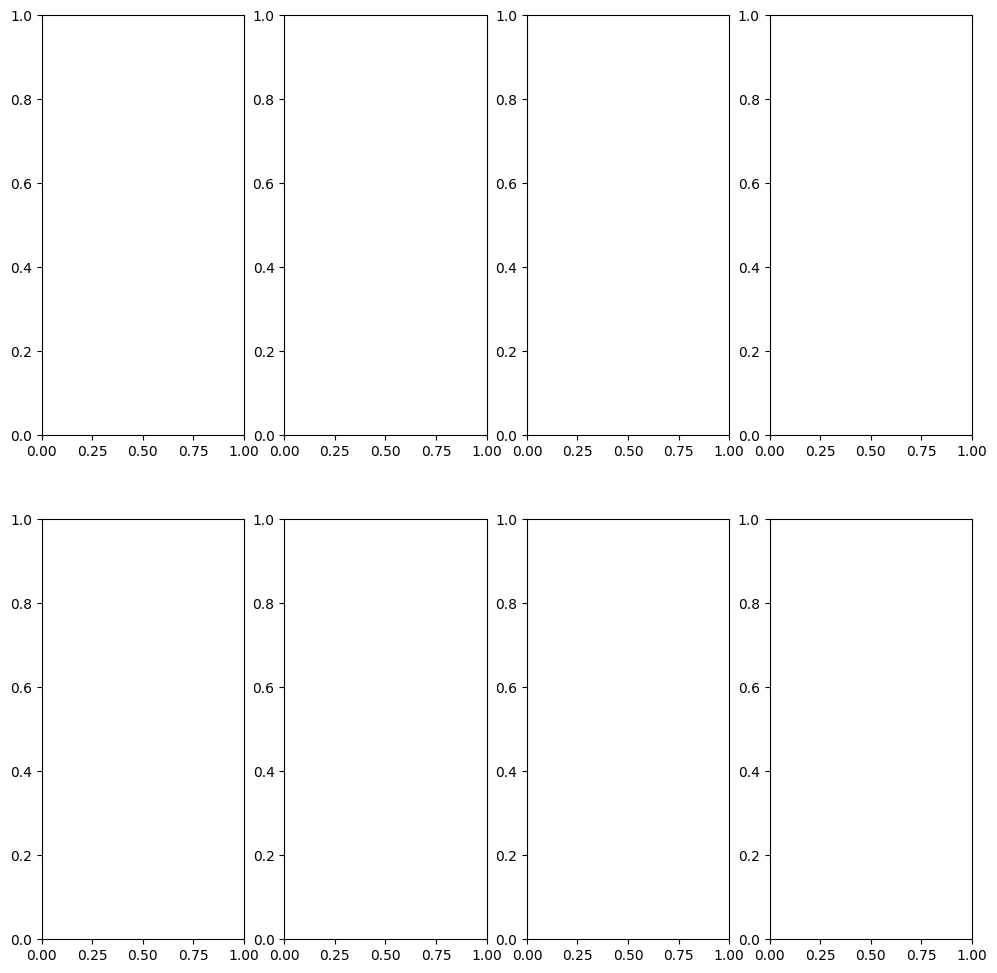

In [135]:
fig, axes = plt.subplots(2, 4, figsize=(12, 12))
axes = axes.flatten()

for i, drug in enumerate(drug_list):
    ax = axes[i]
    
    df_plot = result_df[result_df['Drug']==drug]
    df_plot_test = df_plot[df_plot['Label']=='Test']

    ax.scatter(df_plot['True'], df_plot['Pred'], c='#aad3e3', alpha=0.8, s=100)
    ax.scatter(df_plot_test['True'], df_plot_test['Pred'], c='#7d6c6b', alpha=0.8, s=100)
    x0,x1 = ax.get_xlim()
    y0,y1 = ax.get_ylim()
    ax.set_aspect('equal')
    ax.set_xlim([min(x0,y0), max(x1,y1)+1.5])
    ax.set_ylim([min(x0,y0), max(x1,y1)+1.5])
    ax.plot([min(x0,y0), max(x1,y1)+1.5], [min(x0,y0), max(x1,y1)+1.5], ls="--", c=".3") 
    ax.set_title(drug, fontdict={'fontsize': 15}, fontname="Arial", y=1.02)
    ax.tick_params(labelsize=10)
    ax.grid(which="major", lw=0.8, alpha=0.4)
    ax.set_xlabel('Observed ln(IC50)')
    ax.set_ylabel('Predicted ln(IC50)')

    for j, txt in enumerate(df_plot['Cell_Line'].values.tolist()):
        if abs(df_plot['True'][j]/df_plot['Pred'][j]-1) > 0.1:
            ax.text(df_plot['True'][j], df_plot['Pred'][j], txt.replace('_SKIN', ''), size=7)

plt.tight_layout()
plt.savefig('plot_{}.png'.format(model_name))

# Show the plot
plt.show()

## Correlation between IC50 and survival status

In [ ]:
# assign train and test columns, make them have the same order
resolve_columns = data_skcm_rna_train.drop(columns=['PATIENT_ID', 'OS_STATUS', 'OS_MONTHS'])
resolve_columns = resolve_columns[data.columns.intersection(data_skcm_rna_train.columns)]
missing_cols = set(data.columns) - set(resolve_columns.columns)
for c in missing_cols:
    resolve_columns[c] = 0  # 或者使用其他适合的默认值
resolve_columns = resolve_columns[data.columns]

# print(data.head)
resolve_columns = resolve_columns.drop(columns=['cell_line','Drug.Name','Drug.ID','IC50'])

# delete suplicated columns
resolve_columns = resolve_columns.loc[:, ~resolve_columns.columns.duplicated()]

resolve_columns


/var/folders/p4/2jf9yhzs1nb06w2znky4s3f00000gn/T/ipykernel_28478/2485585567.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  resolve_columns[c] = 0  # 或者使用其他适合的默认值
/var/folders/p4/2jf9yhzs1nb06w2znky4s3f00000gn/T/ipykernel_28478/2485585567.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  resolve_columns[c] = 0  # 或者使用其他适合的默认值
/var/folders/p4/2jf9yhzs1nb06w2znky4s3f00000gn/T/ipykernel_28478/2485585567.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, 

TSPAN6    TNMD     DPM1     SCYL3  FIRRM        FGR       CFH  \
0     382.472  0.4039  798.061  358.2430      0    13.7318   125.202   
1     643.983  0.4015  459.299  382.7080      0   220.8170  1333.330   
2    1913.480  7.8014  703.546  303.1630      0   255.3190   950.355   
3    1113.960  0.3247  329.870  192.3800      0    27.5974   219.805   
4     858.936  0.0000  331.142  212.1010      0    24.2080   190.078   
..        ...     ...      ...       ...    ...        ...       ...   
423   208.196  0.0000  797.634  311.5910      0    88.8889   725.644   
424  2513.050  0.5328  604.156  397.9860      0    18.6468  1474.690   
425   789.147  0.7752  529.070  237.5270      0   159.6900   866.667   
426  1671.250  0.0000  473.756  411.1400      0    33.6957  1308.090   
427   347.883  0.0000  145.823   55.9425      0  1314.3700   384.502   

        FUCA2      GCLC      NFYA  ...    DGCR11    RBAKDN  OR6L2P  OR7M1P  \
0     891.761   392.569   755.246  ...   71.0824  521.1790       0       0   
1    1158.690   702.600  1044.660  ...   32.9218   13.2490       0       0   
2    1823.400   480.851   903.546  ...   58.8652   29.0780       0       0   
3    2669.480   379.546  1378.900  ...   29.2208    3.2468       0       0   
4    1356.550   230.125  1774.060  ...   42.4387    2.2206       0       0   
..        ...       ...       ...  ...       ...       ...     ...     ...   
423  1985.640   893.959  2294.210  ...  121.6730   19.9409       0       0   
424   539.158  1569.530  3053.800  ...   31.9659    5.5621       0       0   
425  2631.780   831.783  1646.510  ...   50.7752    2.9729       0       0   
426  1176.760   389.085  1318.440  ...   26.2078    3.0269       0       0   
427  1064.570   117.051   249.796  ...   28.7723   39.8888       0       0   

     PAXIP1-DT  OR5B15P  LINC02712  LINC02725  OR13I1P  LOC105372990  
0     107.0280        0          0          0        0             0  
1      63.8362        0          0          0        0             0  
2     228.3690        0          0          0        0             0  
3     206.8180        0          0          0        0             0  
4     105.4990        0          0          0        0             0  
..         ...      ...        ...        ...      ...           ...  
423   594.8460        0          0          0        0             0  
424   469.3660        0          0          0        0             0  
425   478.6820        0          0          0        0             0  
426   170.2070        0          0          0        0             0  
427    81.7394        0          0          0        0             0  

[428 rows x 26710 columns]

In [ ]:
# merge rna and patient data together and make format for model test using
patient_data = data_skcm_rna_train[['PATIENT_ID', 'OS_STATUS', 'OS_MONTHS']]
data_skcm_rna_patient = pd.concat([patient_data,resolve_columns], axis=1) 
data_skcm_rna_patient

PATIENT_ID  OS_STATUS  OS_MONTHS    TSPAN6    TNMD     DPM1     SCYL3  \
0    TCGA-3N-A9WB          1  17.029950   382.472  0.4039  798.061  358.2430   
1    TCGA-3N-A9WC          0  66.475984   643.983  0.4015  459.299  382.7080   
2    TCGA-3N-A9WD          1  12.986159  1913.480  7.8014  703.546  303.1630   
3    TCGA-BF-A1PU          0  12.723148  1113.960  0.3247  329.870  192.3800   
4    TCGA-BF-A1PV          0   0.460269   858.936  0.0000  331.142  212.1010   
..            ...        ...        ...       ...     ...      ...       ...   
423  TCGA-YG-AA3O          1  37.939310   208.196  0.0000  797.634  311.5910   
424  TCGA-YG-AA3P          0  14.432719  2513.050  0.5328  604.156  397.9860   
425  TCGA-Z2-A8RT          0  27.583259   789.147  0.7752  529.070  237.5270   
426  TCGA-Z2-AA3S          0  96.985239  1671.250  0.0000  473.756  411.1400   
427  TCGA-Z2-AA3V          0  15.977907   347.883  0.0000  145.823   55.9425   

     FIRRM        FGR       CFH  ...    DGCR11    RBAKDN  OR6L2P  OR7M1P  \
0        0    13.7318   125.202  ...   71.0824  521.1790       0       0   
1        0   220.8170  1333.330  ...   32.9218   13.2490       0       0   
2        0   255.3190   950.355  ...   58.8652   29.0780       0       0   
3        0    27.5974   219.805  ...   29.2208    3.2468       0       0   
4        0    24.2080   190.078  ...   42.4387    2.2206       0       0   
..     ...        ...       ...  ...       ...       ...     ...     ...   
423      0    88.8889   725.644  ...  121.6730   19.9409       0       0   
424      0    18.6468  1474.690  ...   31.9659    5.5621       0       0   
425      0   159.6900   866.667  ...   50.7752    2.9729       0       0   
426      0    33.6957  1308.090  ...   26.2078    3.0269       0       0   
427      0  1314.3700   384.502  ...   28.7723   39.8888       0       0   

     PAXIP1-DT  OR5B15P  LINC02712  LINC02725  OR13I1P  LOC105372990  
0     107.0280        0          0          0        0             0  
1      63.8362        0          0          0        0             0  
2     228.3690        0          0          0        0             0  
3     206.8180        0          0          0        0             0  
4     105.4990        0          0          0        0             0  
..         ...      ...        ...        ...      ...           ...  
423   594.8460        0          0          0        0             0  
424   469.3660        0          0          0        0             0  
425   478.6820        0          0          0        0             0  
426   170.2070        0          0          0        0             0  
427    81.7394        0          0          0        0             0  

[428 rows x 26713 columns]

428
drug name: Dacarbazine
14 train samples
428 test samples
model feature count = 18
{'max_depth': 3, 'max_features': 25, 'min_samples_split': 2, 'n_estimators': 10}
------------------------------


/Users/stan/anaconda3/envs/new_env/lib/python3.11/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


428
drug name: Temozolomide
21 train samples
428 test samples
model feature count = 26
{'max_depth': 5, 'max_features': 25, 'min_samples_split': 2, 'n_estimators': 200}
------------------------------


/Users/stan/anaconda3/envs/new_env/lib/python3.11/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


428
drug name: Paclitaxel
26 train samples
428 test samples
model feature count = 27
{'max_depth': 10, 'max_features': 10, 'min_samples_split': 5, 'n_estimators': 100}
------------------------------
428
drug name: Cisplatin
42 train samples
428 test samples
model feature count = 30
{'max_depth': 3, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 200}
------------------------------


/Users/stan/anaconda3/envs/new_env/lib/python3.11/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


428
drug name: Dabrafenib
21 train samples
428 test samples
model feature count = 37
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 10}
------------------------------


/Users/stan/anaconda3/envs/new_env/lib/python3.11/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


428
drug name: Trametinib
21 train samples
428 test samples
model feature count = 35
{'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 10}
------------------------------
428
drug name: Nilotinib
21 train samples
428 test samples
model feature count = 28
{'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 5, 'n_estimators': 200}
------------------------------


/Users/stan/anaconda3/envs/new_env/lib/python3.11/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


428
drug name: Dasatinib
26 train samples
428 test samples
model feature count = 30
{'max_depth': 3, 'max_features': 'sqrt', 'min_samples_split': 10, 'n_estimators': 50}
------------------------------


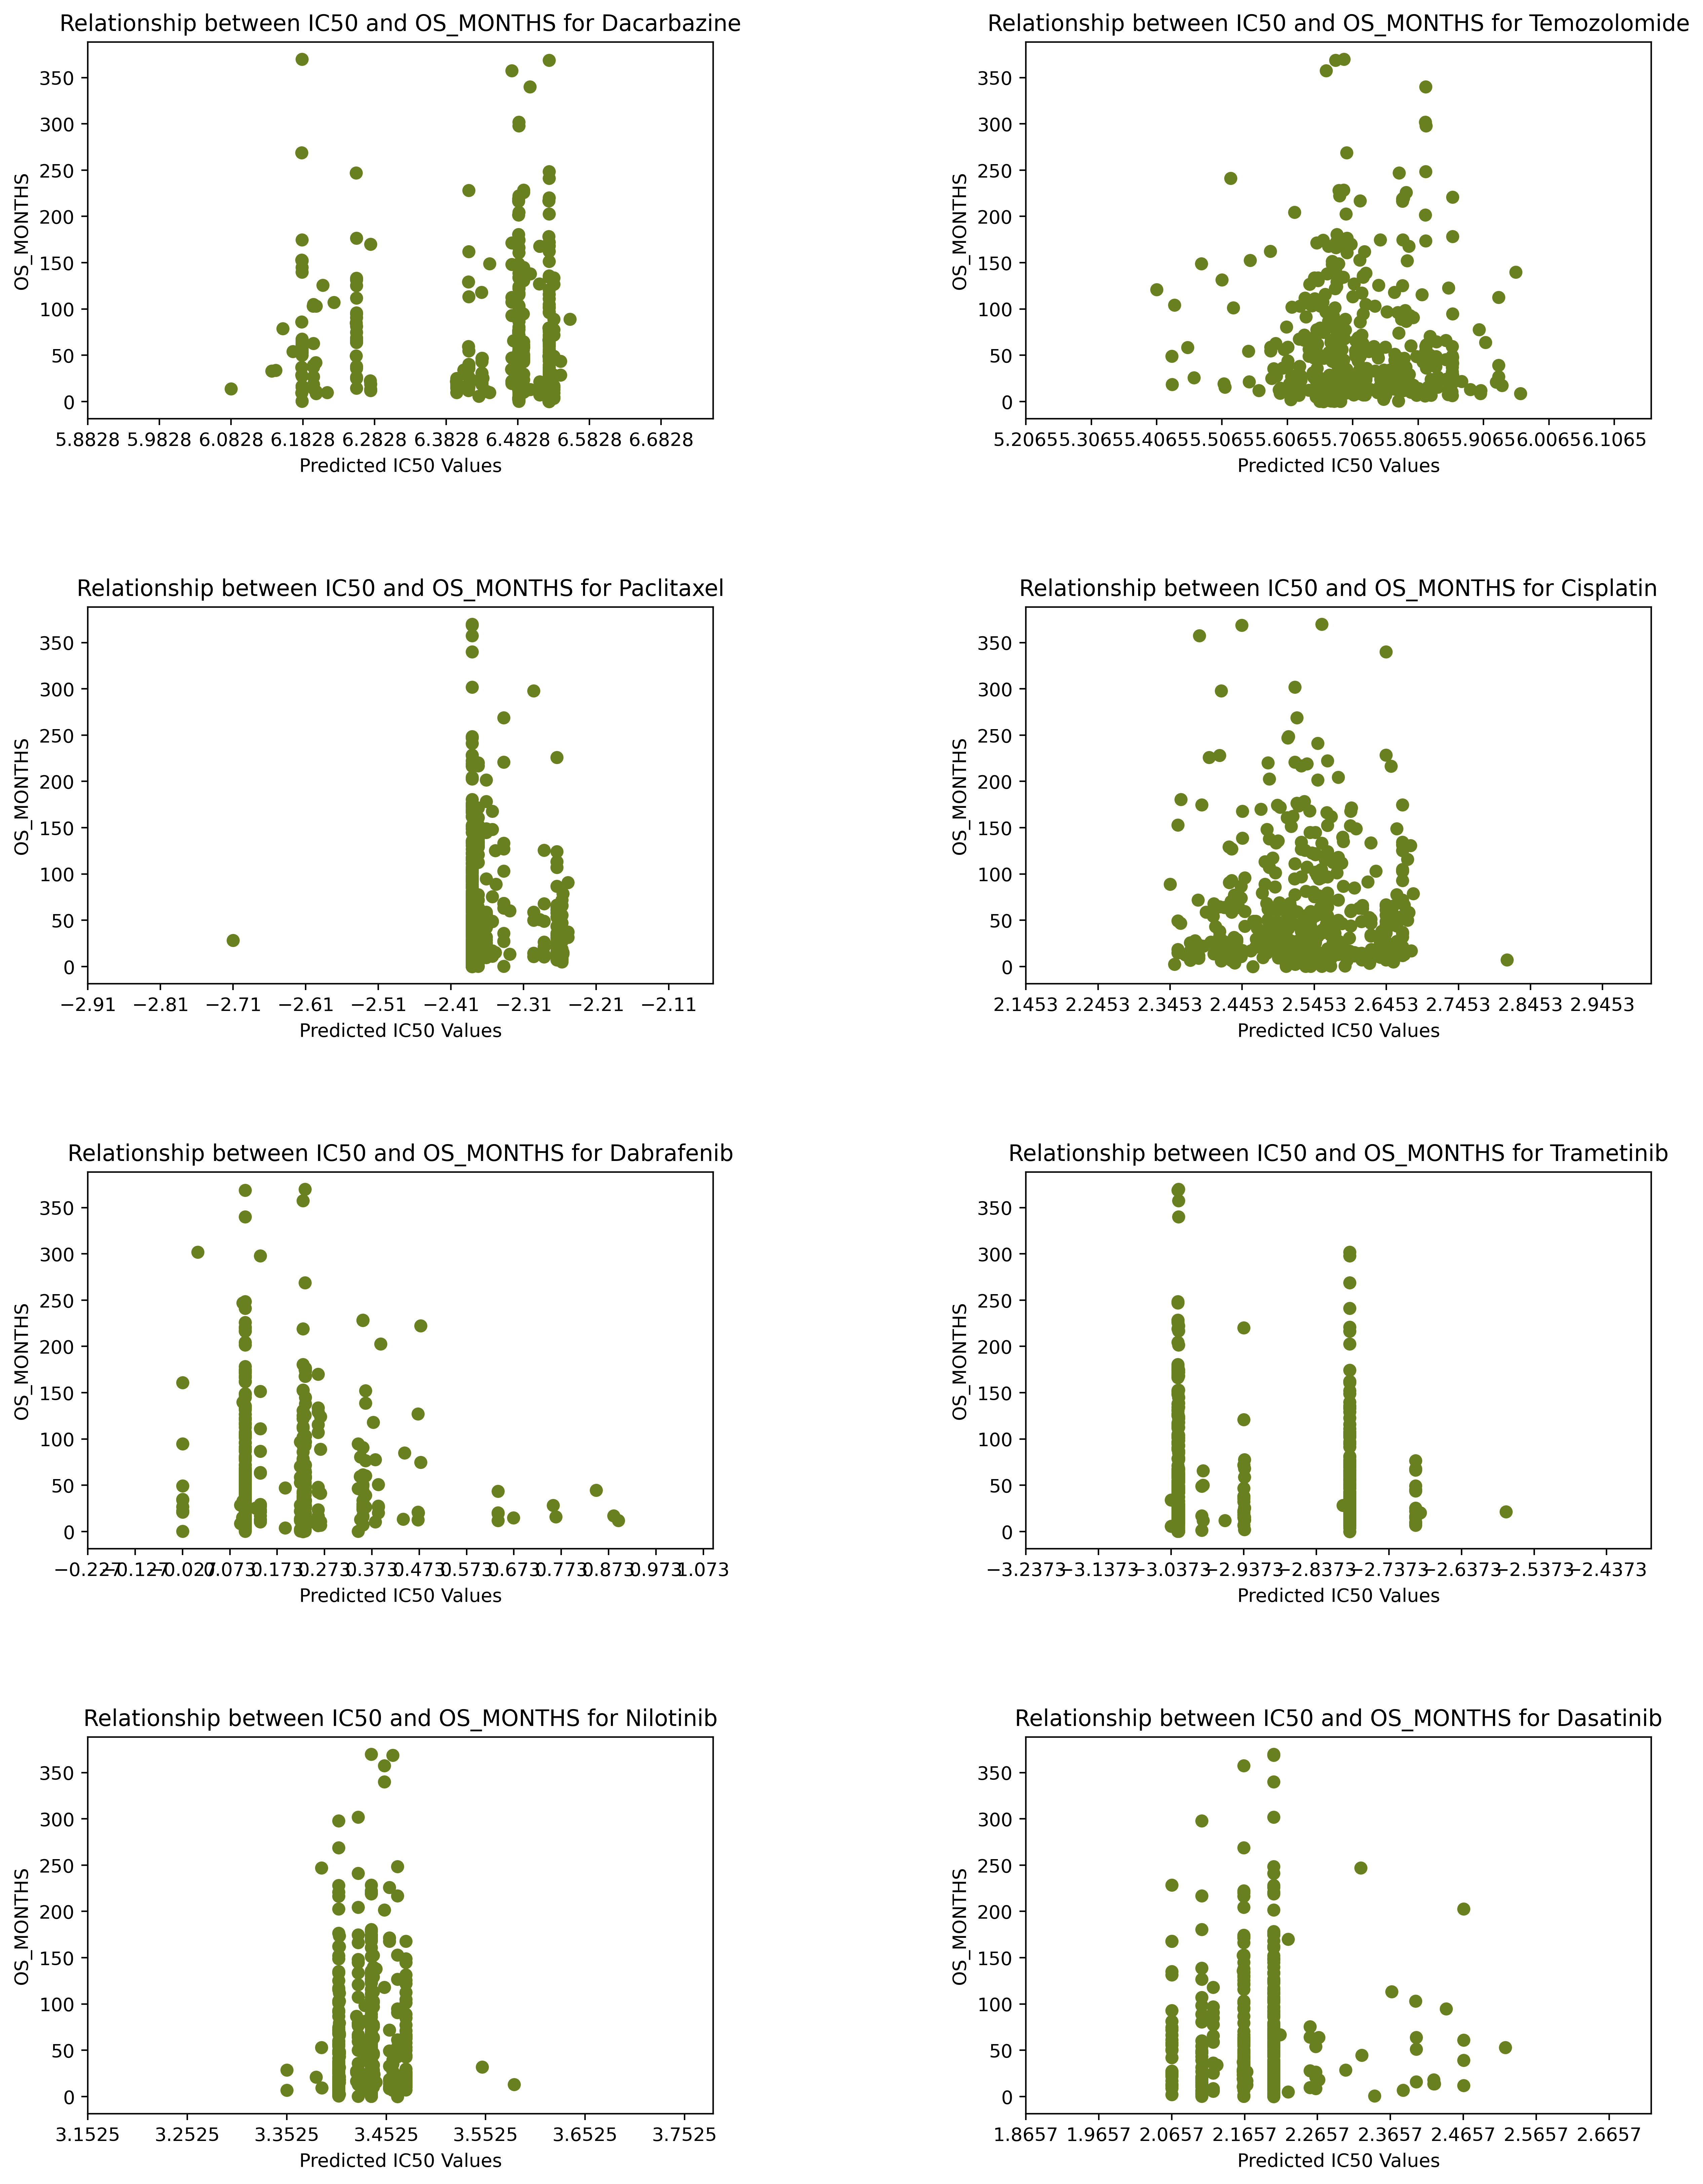

In [ ]:
result_df = pd.DataFrame()

fig = plt.figure(figsize=(15,20),dpi=400)
fig.subplots_adjust(hspace=0.5, wspace=0.5)
num = 1


for drug in drug_list:
    # filter input data to model
    input = data[data['Drug.Name']==drug]

    # train test split
    train, test = train_test_split(input, test_size=0.3, random_state=1)
    
    x_train = train.drop(columns=['cell_line','Drug.Name','Drug.ID','IC50'])
    y_train = train['IC50']
    
    x_test= data_skcm_rna_patient.drop(columns=['PATIENT_ID', 'OS_STATUS', 'OS_MONTHS']) # use random forest model test survival data


    scaler = StandardScaler().fit(x_train)
    x_train_scaled = scaler.transform(x_train)
    x_test_scaled = scaler.transform(x_test)

    # feature selection
    sel_ = SelectFromModel(Lasso(alpha=1e-3, random_state=1, max_iter=10000)) 
    sel_.fit(x_train_scaled, y_train)

    x_train_sel = sel_.transform(x_train_scaled)
    x_test_sel = sel_.transform(x_test_scaled)
    if model_name=="RF":
        
        model = RandomForestRegressor(random_state=1)
        # grid search
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2')
        grid_search.fit(x_train_sel, y_train)
        best_params = grid_search.best_params_
    
        # fit model
        model = RandomForestRegressor(random_state=1, **best_params)      
        #model = RandomForestRegressor(random_state=1, n_estimators=200, max_features=25)
        
        model.fit(x_train_sel, y_train)
        
    elif model_name=="LR":
        model = Ridge(alpha=1.0)
        #model = LinearRegression()
        model.fit(x_train_sel, y_train)


    # cross-validation
    rmse_cv = -1*cross_val_score(model, x_train_sel, y_train,
                              cv=5,
                              scoring='neg_mean_squared_error').mean()
    r2_value_cv = cross_val_score(model, x_train_sel, y_train,
                              cv=5,
                              scoring='r2').mean()

    pred_value = model.predict(x_test_sel)

    print(len(pred_value))

    y = input['IC50']
    
                       
    pred_ = pd.DataFrame(pred_value).reset_index().drop(columns=['index'])
    pred_.columns = ['Pred_IC50']
    # true_ = pd.DataFrame(y).reset_index().drop(columns=['index'])
    result_df = pd.concat([data_skcm_rna_patient,pred_], axis=1)
    result_df['Drug']= drug
    result_df.to_csv('IC50_survival_status_{}.csv'.format(drug), index=False)


    print("drug name: {}".format(drug))
    print(x_train.shape[0], 'train samples')
    print(x_test.shape[0], 'test samples')
    print("model feature count = {}".format(model.n_features_in_))
    if model_name=="RF": print(best_params)
    print('-' * 30)

    plt.subplot(4,2,num)
    plt.scatter(result_df['Pred_IC50'], result_df['OS_MONTHS'], c='#698020')
    plt.tick_params(labelsize=10)
    plt.title(f"Relationship between IC50 and OS_MONTHS for {drug}")
    plt.xlim(result_df['Pred_IC50'].min() - 0.2, result_df['Pred_IC50'].max() + 0.2)
    plt.xticks(np.arange(result_df['Pred_IC50'].min() - 0.2, result_df['Pred_IC50'].max() + 0.2, 0.1))
    plt.xlabel('Predicted IC50 Values')
    plt.ylabel('OS_MONTHS')  
    
    num += 1



In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(12, 12))
axes = axes.flatten()

for i, drug in enumerate(drug_list):
    ax = axes[i]
    
    df_plot = result_df[result_df['Drug']==drug]
    df_plot_test = df_plot[df_plot['Label']=='Test']

    ax.scatter(df_plot['True'], df_plot['Pred'], c='#aad3e3', alpha=0.8, s=100)
    ax.scatter(df_plot_test['True'], df_plot_test['Pred'], c='#7d6c6b', alpha=0.8, s=100)
    
    x0,x1 = ax.get_xlim()
    y0,y1 = ax.get_ylim()

    ax.set_aspect('equal')
    ax.set_xlim([min(x0,y0), max(x1,y1)+1.5])
    ax.set_ylim([min(x0,y0), max(x1,y1)+1.5])
    ax.plot([min(x0,y0), max(x1,y1)+1.5], [min(x0,y0), max(x1,y1)+1.5], ls="--", c=".3") 
    ax.set_title(drug, fontdict={'fontsize': 15}, fontname="Arial", y=1.02)
    ax.tick_params(labelsize=10)
    ax.grid(which="major", lw=0.8, alpha=0.4)
    ax.set_xlabel('Observed ln(IC50)')
    ax.set_ylabel('Predicted ln(IC50)')

    for j, txt in enumerate(df_plot['Cell_Line'].values.tolist()):
        if abs(df_plot['True'][j]/df_plot['Pred'][j]-1) > 0.1:
            ax.text(df_plot['True'][j], df_plot['Pred'][j], txt.replace('_SKIN', ''), size=7)

plt.tight_layout()
plt.savefig('plot_{}.png'.format(model_name))

# Show the plot
plt.show()

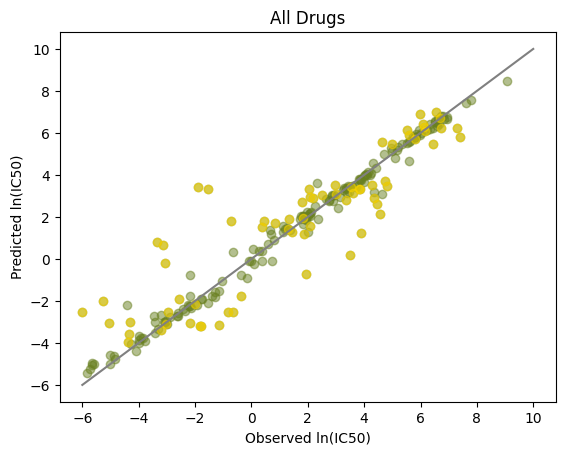

In [514]:
plt.figure()
result_df_test = result_df[result_df['Label']=="Test"]
plt.scatter(result_df['True'], result_df['Pred'], c='#698020', alpha=0.5)
plt.scatter(result_df_test['True'], result_df_test['Pred'], c='#ffd700', alpha=0.5)
plt.plot([-6, 10], [-6, 10], ls="-", c="grey")
plt.title("All Drugs")
plt.xlabel('Observed ln(IC50)')
plt.ylabel('Predicted ln(IC50)')
plt.savefig('plot_all_{}.png'.format(model_name))
plt.show()

## code below is not used

### lasso regression

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.059e-03, tolerance: 5.249e-04
  model = cd_fast.enet_coordinate_descent(


drug name: Dacarbazine
14 train samples
6 test samples
rmse value = 0.7993999589833597
r-squared value = -0.25539725627634113
------------------------------


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.326e-03, tolerance: 3.467e-03
  model = cd_fast.enet_coordinate_descent(


drug name: Temozolomide
21 train samples
9 test samples
rmse value = 1.0881423380990825
r-squared value = -1.0792863046429737
------------------------------


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.177e-02, tolerance: 4.306e-03
  model = cd_fast.enet_coordinate_descent(


drug name: Paclitaxel
21 train samples
9 test samples
rmse value = 0.9899590683812881
r-squared value = 0.28473176278219137
------------------------------


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.435e-03, tolerance: 1.835e-03
  model = cd_fast.enet_coordinate_descent(


drug name: Cisplatin
14 train samples
6 test samples
rmse value = 1.3288844184847721
r-squared value = 0.04333895649647379
------------------------------


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.995e-02, tolerance: 1.410e-02
  model = cd_fast.enet_coordinate_descent(


drug name: Dabrafenib
19 train samples
9 test samples
rmse value = 3.9144391953914357
r-squared value = -0.28885371164470164
------------------------------


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.887e-02, tolerance: 6.593e-03
  model = cd_fast.enet_coordinate_descent(


drug name: Trametinib
21 train samples
9 test samples
rmse value = 2.1608678865199193
r-squared value = -0.19169815198198492
------------------------------


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.529e-03, tolerance: 2.121e-03
  model = cd_fast.enet_coordinate_descent(


drug name: Nilotinib
21 train samples
9 test samples
rmse value = 0.7711589441717388
r-squared value = 0.05856107362029539
------------------------------


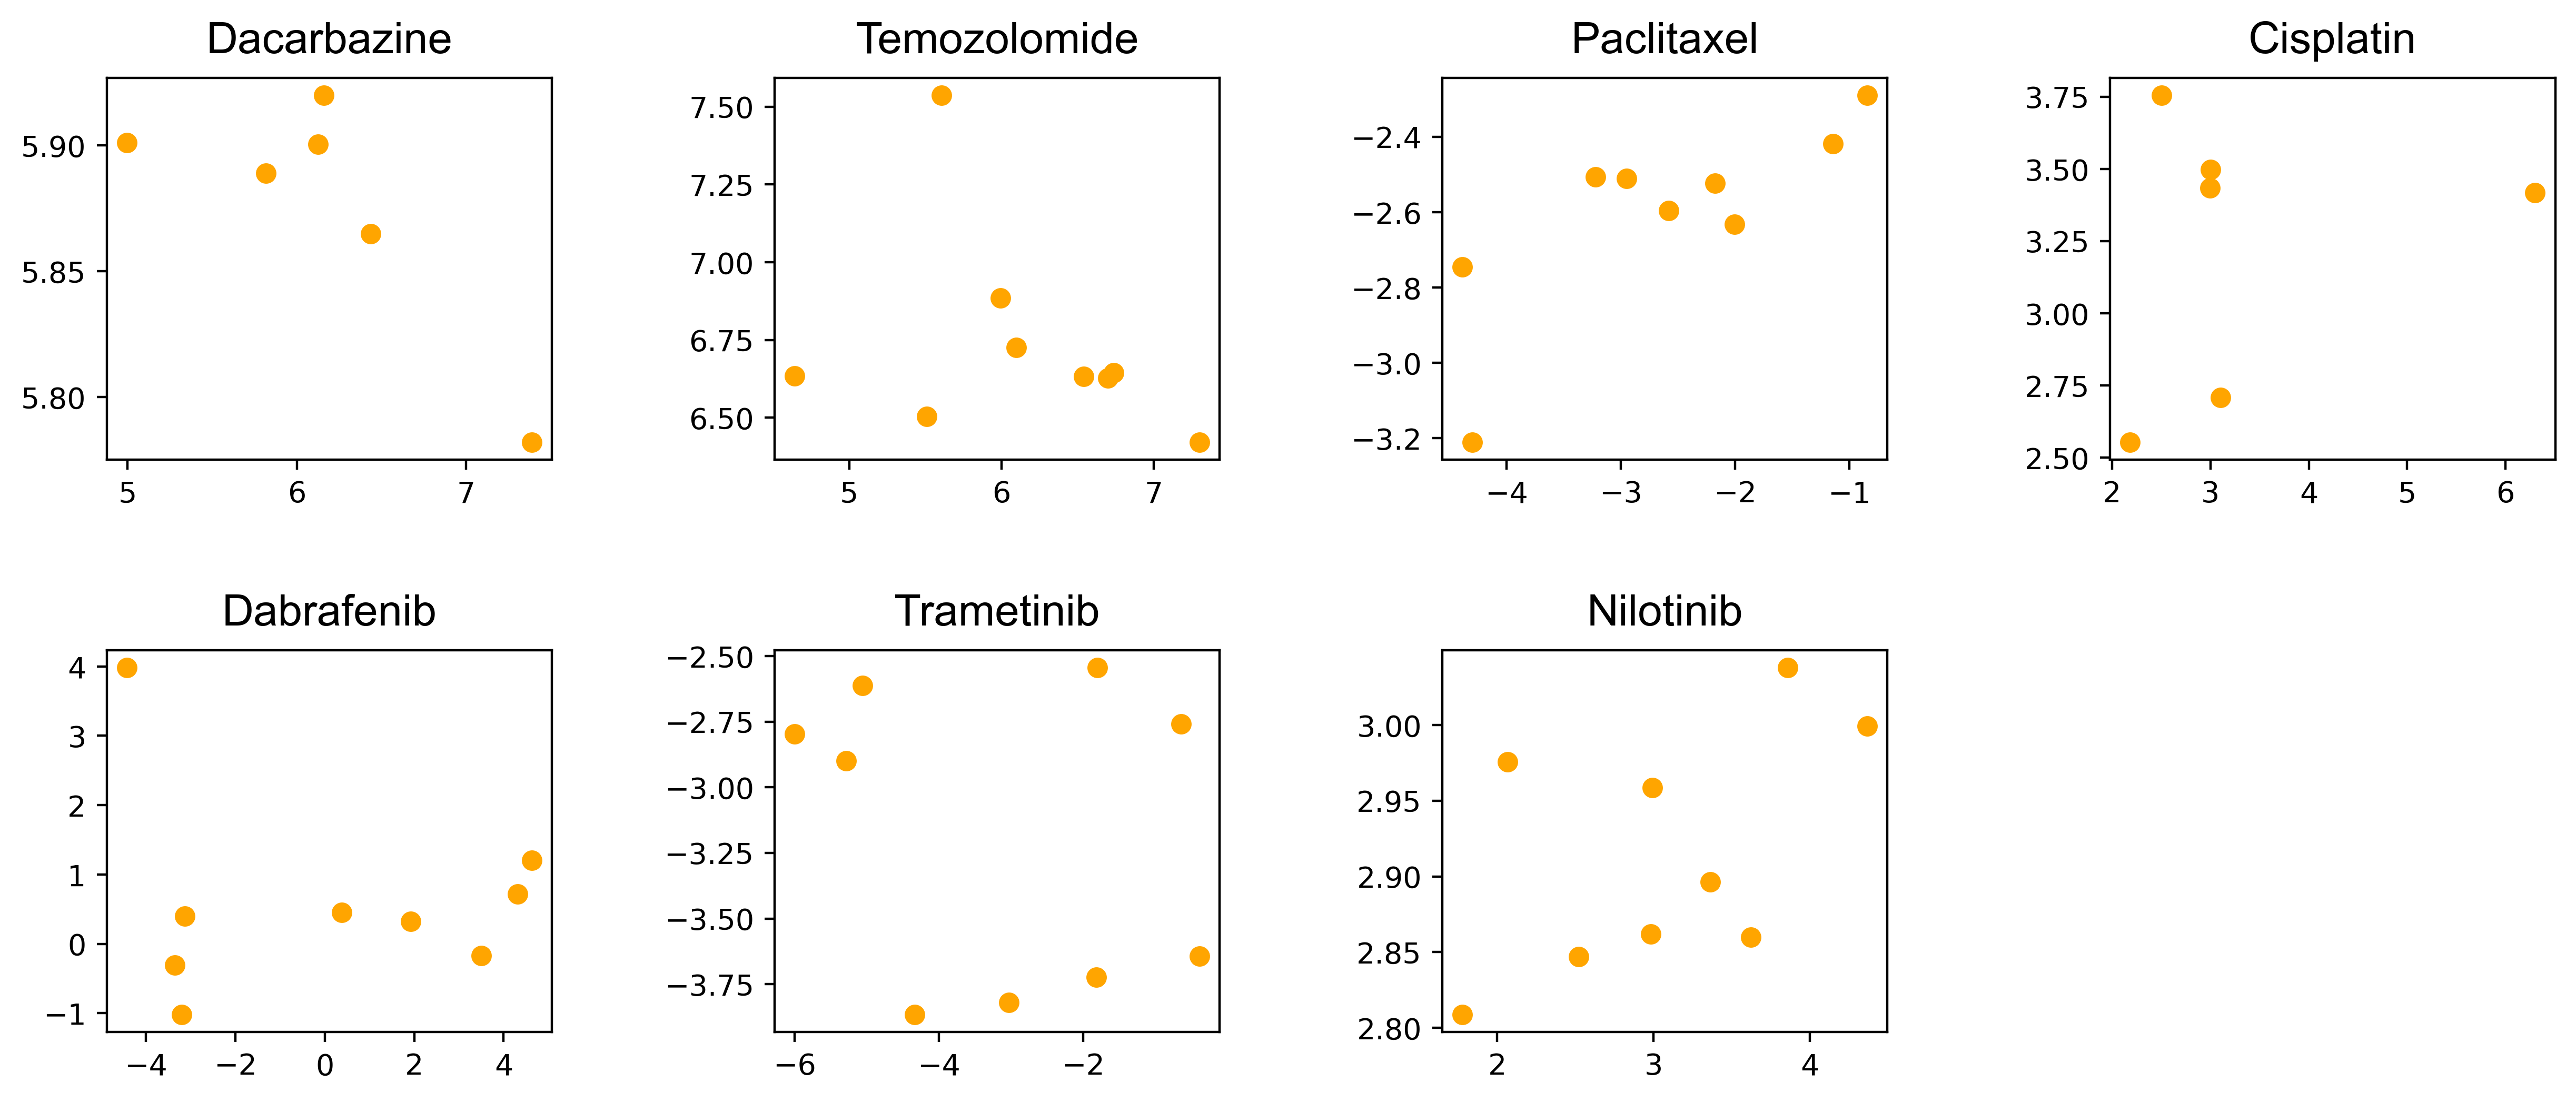

In [136]:
result_df = pd.DataFrame()
rmselist = []
r2list = []

fig = plt.figure(figsize=(15,20),dpi=400)
fig.subplots_adjust(hspace=0.5, wspace=0.5)
num = 1

for drug in drug_list:
    # filter input data to model
    input = data[data['Drug.Name']==drug]

    # train test split
    train, test = train_test_split(input, test_size=0.3, random_state=1)
    
    x_train = train.drop(columns=['cell_line','Drug.Name','IC50'])
    y_train = train['IC50']
    
    x_test = test.drop(columns=['cell_line','Drug.Name','IC50'])
    y_test = test['IC50']

    # train the predictor
    reg = Lasso(alpha=0.001)
    reg.fit(x_train, y_train)

    # test the predictor
    pred_value = reg.predict(x_test)

    df_pred = pd.DataFrame(pred_value).reset_index().drop(columns=['index'])
    df_true = pd.DataFrame(y_test).reset_index().drop(columns=['index'])
    result = pd.concat([df_pred, df_true], axis=1, ignore_index=True)
    result.columns=["Predicted", "Test"]
    #result_df = pd.concat([result_df, result], axis=0)

    # evaluation metrics
    rse = ((result['Predicted']-result['Test'])**2).sum()
    mse = rse / len(result)
    rmse = np.sqrt(mse)
    
    r2_value = r2_score(result['Test'], result['Predicted'])
      
    rmselist.append(rmse)
    r2list.append(r2_value)

    print("drug name: {}".format(drug))
    print(x_train.shape[0], 'train samples')
    print(x_test.shape[0], 'test samples')
    print("rmse value = {}".format(rmse))
    print("r-squared value = {}".format(r2_value))
    print('-' * 30)

    plt.subplot(6,4,num)
    plt.scatter(y_test, pred_value, c='orange')
    plt.title(drug, fontdict ={'fontsize' : 15}, fontname="Arial", y = 1.02)
    plt.tick_params(labelsize=10)
    
    num += 1


### svr

drug name: Dacarbazine
14 train samples
6 test samples
rmse value = 0.7449974375965117
r-squared value = -0.09034136841005513
------------------------------
drug name: Temozolomide
21 train samples
9 test samples
rmse value = 0.7995307441073249
r-squared value = -0.1225694334880032
------------------------------
drug name: Paclitaxel
21 train samples
9 test samples
rmse value = 1.1754071002450512
r-squared value = -0.008349489799886811
------------------------------
drug name: Cisplatin
14 train samples
6 test samples
rmse value = 1.3677574722942012
r-squared value = -0.01344891711144447
------------------------------
drug name: Dabrafenib
19 train samples
9 test samples
rmse value = 3.4495173243813326
r-squared value = -0.0008780954297018528
------------------------------
drug name: Trametinib
21 train samples
9 test samples
rmse value = 2.013838718501227
r-squared value = -0.0350449436113478
------------------------------
drug name: Nilotinib
21 train samples
9 test samples
rmse valu

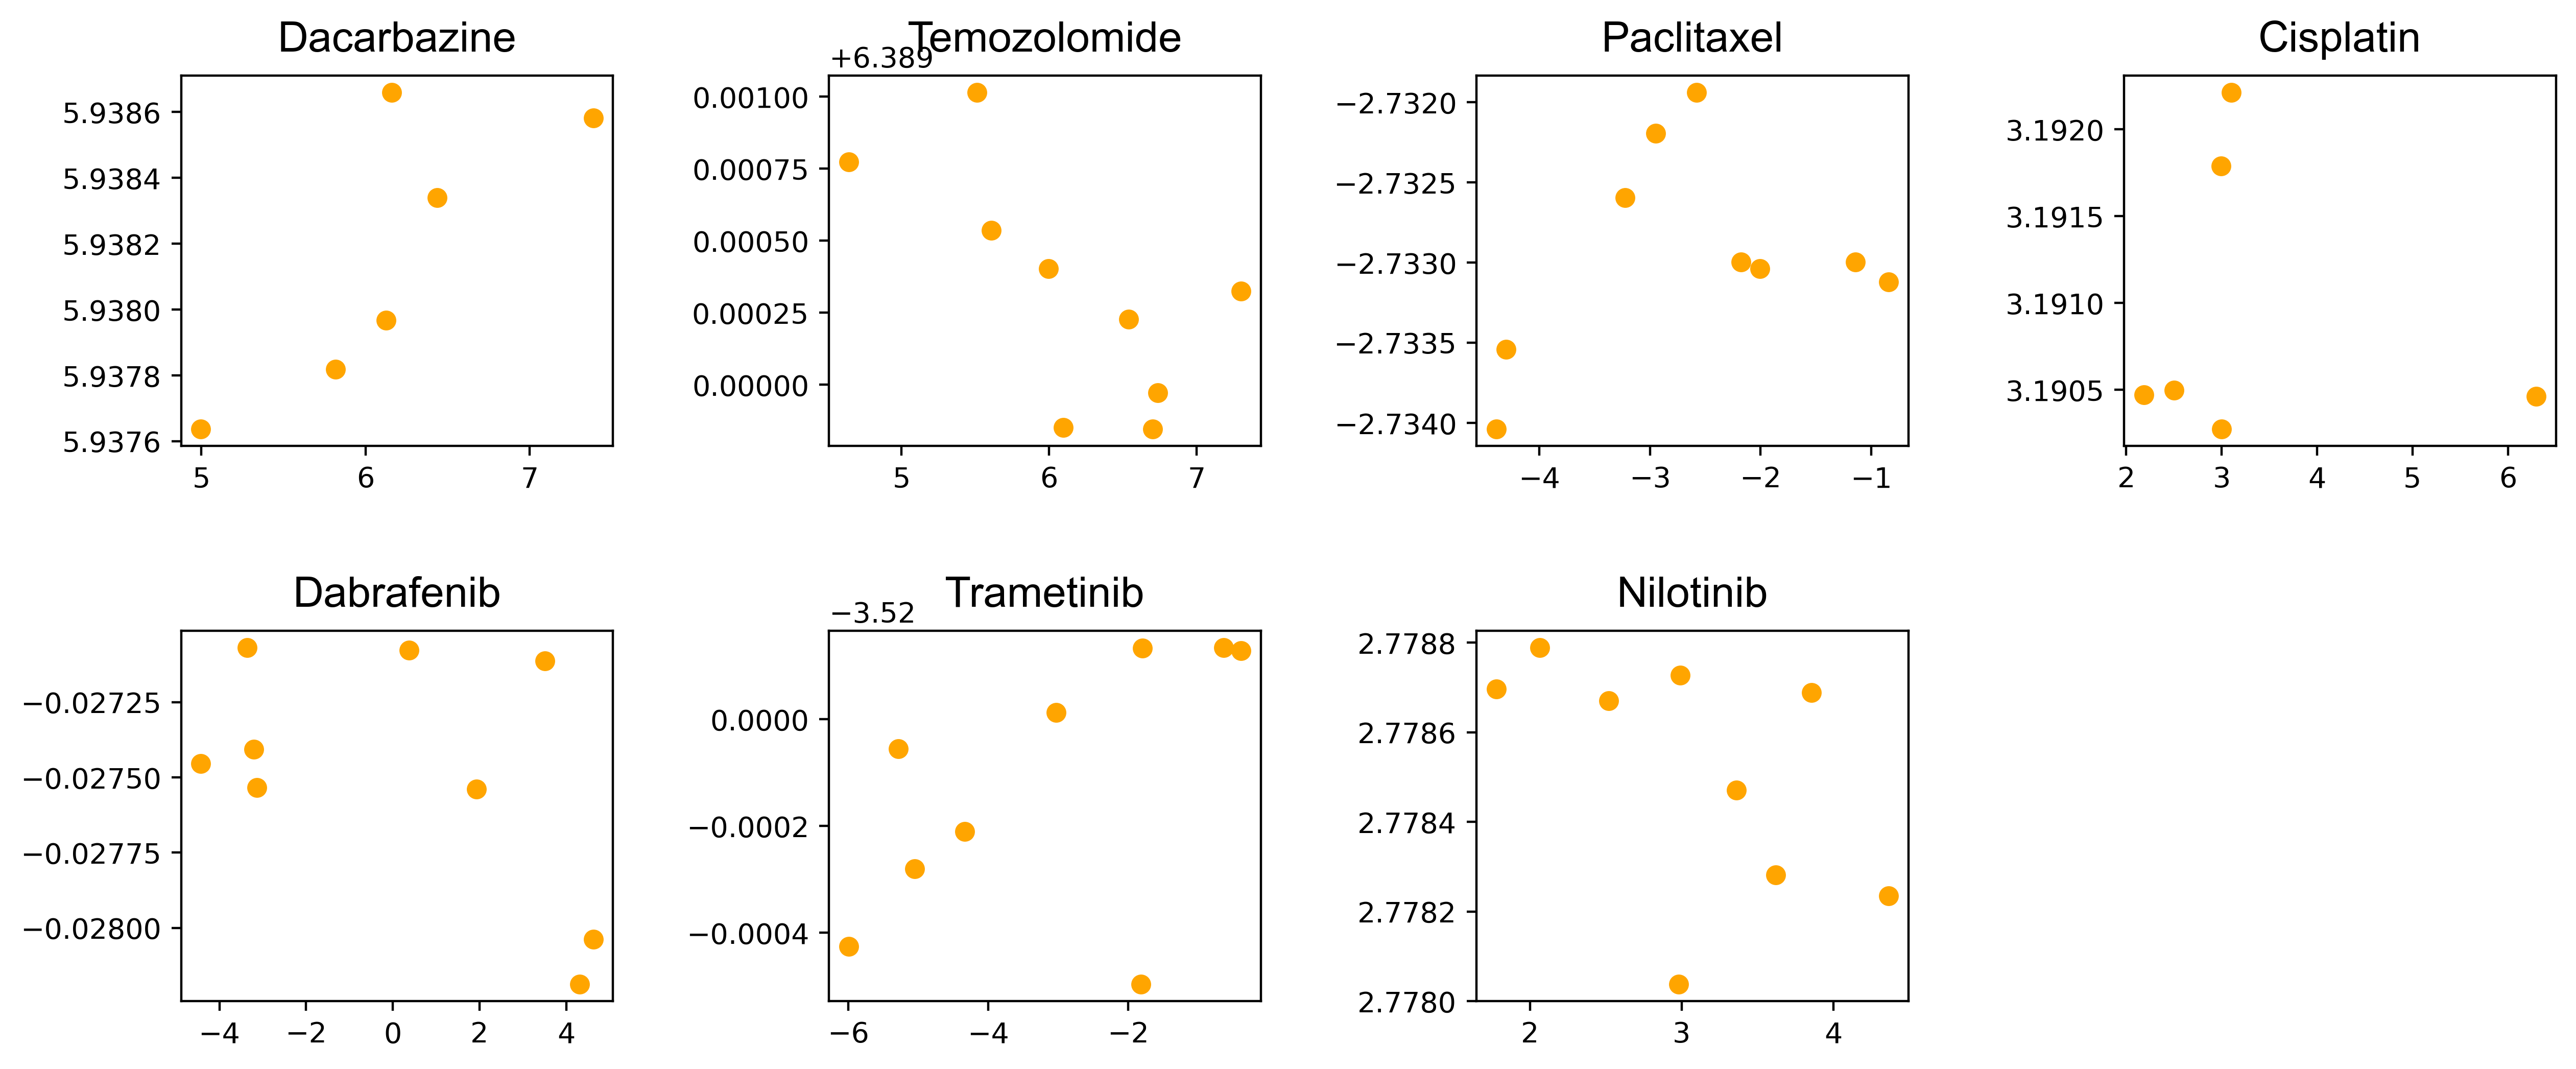

In [140]:
result_df = pd.DataFrame()
rmselist = []
r2list = []

fig = plt.figure(figsize=(15,20),dpi=400)
fig.subplots_adjust(hspace=0.5, wspace=0.5)
num = 1

for drug in drug_list:
    # filter input data to model
    input = data[data['Drug.Name']==drug]

    # train test split
    train, test = train_test_split(input, test_size=0.3, random_state=1)
    
    x_train = train.drop(columns=['cell_line','Drug.Name','IC50'])
    y_train = train['IC50']
    
    x_test = test.drop(columns=['cell_line','Drug.Name','IC50'])
    y_test = test['IC50']

    # train the predictor
    svr = SVR(C=0.01)
    svr.fit(x_train, y_train)

    # test the predictor
    pred_value = svr.predict(x_test)

    df_pred = pd.DataFrame(pred_value).reset_index().drop(columns=['index'])
    df_true = pd.DataFrame(y_test).reset_index().drop(columns=['index'])
    result = pd.concat([df_pred, df_true], axis=1, ignore_index=True)
    result.columns=["Predicted", "Test"]
    #result_df = pd.concat([result_df, result], axis=0)

    # evaluation metrics
    rse = ((result['Predicted']-result['Test'])**2).sum()
    mse = rse / len(result)
    rmse = np.sqrt(mse)
    
    r2_value = r2_score(result['Test'], result['Predicted'])
      
    rmselist.append(rmse)
    r2list.append(r2_value)

    print("drug name: {}".format(drug))
    print(x_train.shape[0], 'train samples')
    print(x_test.shape[0], 'test samples')
    print("rmse value = {}".format(rmse))
    print("r-squared value = {}".format(r2_value))
    print('-' * 30)

    plt.subplot(6,4,num)
    plt.scatter(y_test, pred_value, c='orange')
    plt.title(drug, fontdict ={'fontsize' : 15}, fontname="Arial", y = 1.02)
    plt.tick_params(labelsize=10)
    
    num += 1


In [478]:
sel_.get_feature_names_out()

AttributeError: 'SelectFromModel' object has no attribute 'feature_names_in_'

In [480]:
model.coef_

array([ 0.01097415, -0.10054611, -0.0228307 ,  0.07690508,  0.00809181,
       -0.05974806,  0.10027088,  0.03913047,  0.06843644, -0.0836017 ,
        0.00279173, -0.08093967,  0.00340464,  0.02582745, -0.10856695,
        0.00595874, -0.07766115, -0.21423599, -0.04877487, -0.05516655,
        0.10112601, -0.08841671])

In [481]:
model.feature_names_in_

AttributeError: 'LinearRegression' object has no attribute 'feature_names_in_'